# Two reviewers and one arbitrator

**Description:** Two reviewers receive a list of factual claims disclosing relevant information to draft a prenuptial agreement. These claims are free of subjectivity and opinions and refer to the initial conditions of the negotiation. 
Each one of the reviewers takes the side of one of the parties, and generates a lists of risks that are relevant to generate the final draft. Both reviewers pass their recommendations to an arbitrator, through aggregation and sorting of the claims, so the arbitrator cannot know where the recommendations came from. The arbitrator addresses the concerns and passes a document to a drafter, who creates the final document. 

## Visual Overview

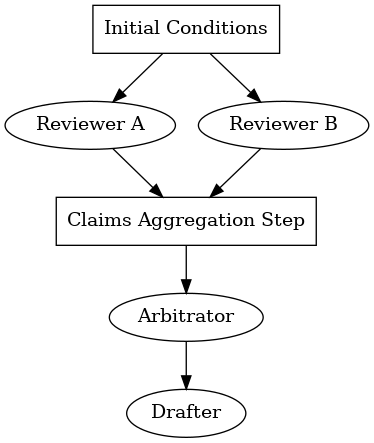

In [1]:
import graphviz
from IPython.display import Image

two_reviewers_one_arbitrator = graphviz.Digraph('Two Reviewers, One Arbitrator, One Drafter', format='png')
### Nodes
two_reviewers_one_arbitrator.node('F','Initial Conditions', shape='rectangle')
two_reviewers_one_arbitrator.node('A', 'Reviewer A')
two_reviewers_one_arbitrator.node('B', 'Reviewer B')
two_reviewers_one_arbitrator.node('C', 'Claims Aggregation Step', shape='rectangle')
two_reviewers_one_arbitrator.node('D', 'Arbitrator')
two_reviewers_one_arbitrator.node('E', 'Drafter')
### Edges
two_reviewers_one_arbitrator.edge('F', 'A')
two_reviewers_one_arbitrator.edge('F', 'B')
two_reviewers_one_arbitrator.edge('A', 'C')
two_reviewers_one_arbitrator.edge('B', 'C')
two_reviewers_one_arbitrator.edge('C', 'D')
two_reviewers_one_arbitrator.edge('D', 'E')

two_reviewers_one_arbitrator.render('two_reviewers_one_arbitrator', format="png", view=False)
Image(filename='two_reviewers_one_arbitrator.png') 

## Supporting prompts

### Reviewer

In [ ]:
from rawlsian_agents.agents.reviewer import Reviewer
import warnings
warnings.simplefilter('ignore')

reviewer = Reviewer()
print(reviewer.prompt.template)


You are an AI representative assigned to analyze and prioritize the interests of {name} in the given scenario. Your primary responsibility is to identify and evaluate potential future risks that could impact {name} under the terms of the agreement. 

Consider both immediate and long-term risks, including financial, emotional, legal, and social factors. Assess how external influences, such as economic downturns, job loss, family expectations, or legal loopholes, could affect the agreement. Analyze whether any power imbalances exist in the negotiation process and determine if certain clauses disproportionately benefit one party. Where relevant, suggest ways to rebalance the agreement to promote fairness.

For each risk, explore a counterfactual scenario by considering how the situation might change under different conditions, such as one party experiencing a significant financial shift, unexpected health challenges, or legislative changes that could alter the effectiveness of the agreem

### Arbitrator

In [ ]:
from rawlsian_agents.agents.arbitrator import Arbitrator
import warnings
warnings.simplefilter('ignore')

arbitrator = Arbitrator()
print(arbitrator.prompt.template)


You have a detailed prenuptial agreement that outlines the specific terms and conditions both parties have agreed upon. One of the clients has raised a concern about a potential future risk that could have serious implications for both individuals. Your task is to assess this risk comprehensively and, if necessary, suggest specific claims or strategies to mitigate it. 

Power imbalances in prenuptial agreements can arise from financial disparities, emotional leverage, legal knowledge gaps, or external influences such as family pressure. Consider how these factors may affect fairness over time. 

To ensure a well-rounded analysis, evaluate the risk from multiple perspectives:

Legal & Financial: Could disparities in financial knowledge or access to legal counsel create an unfair advantage for one party?
Emotional & Psychological: Is there potential for emotional coercion, implicit pressure, or fear of retaliation to impact decision-making?
Social & External Influences: Could external f

### Drafter

In [ ]:
from rawlsian_agents.agents.drafter import Drafter
import warnings
warnings.simplefilter('ignore')

drafter = Drafter()
print(drafter.prompt.template)


You are provided with a detailed prenuptial agreement and a list of proposed edits from the legal team intended to improve its fairness and clarity. Your task is to produce a final version of the prenuptial agreement that fully incorporates each proposed edit into the text. Do not simply insert the edit instructions verbatim; instead, seamlessly modify the relevant sections of the agreement so that the changes appear as part of the natural language of the document.

Below are the proposed edits and the current agreement:

Proposed Edits:
{edits}

Original Prenuptial Agreement:
{agreement}

Instructions:
- Review the proposed edits carefully.
- For each edit, modify the corresponding section in the agreement to reflect the intended change.
- Do not include any residual language such as “Add a clause…” in the final document.
- Ensure that the final agreement reads as a coherent, integrated legal document with all changes incorporated.

